The aime of this notobook is to understand how to function ImageDataGenerator to create more images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array

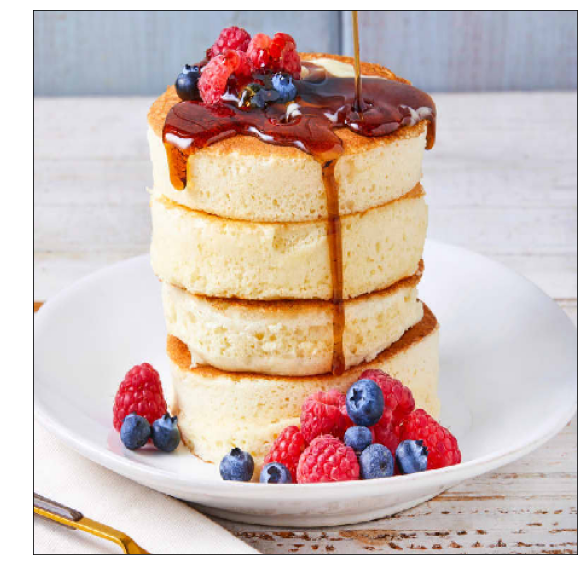

In [3]:
# read image アップロードされた画像を読み込み
img = image.load_img("fig1.jpg", target_size=(450, 450))
# change the image to numpy array 画像をnumpy配列に変換する
img = np.array(img)
# set the image size 表示画像のサイズを設定
plt.figure(figsize = (10, 10))
# no show the frame軸を表示しない
plt.xticks(color = "None")
plt.yticks(color = "None")
plt.tick_params(bottom = False, left = False)
# show image 表示
plt.imshow(img)

In [11]:
augmented_datagen = ImageDataGenerator(
    rotation_range=40,
)

In [20]:

#画像表示用の関数を定義
def show(datagen, img):
  #表示サイズを設定
  plt.figure(figsize = (10, 5))
  
  #画像をbatch_sizeの数ずつdataに入れる
  #本稿は画像が一枚のため同じ画像がdataに入り続けることになる
  for i, data in enumerate(datagen.flow(img, batch_size = 1, seed = 0)):
    #表示のためnumpy配列からimgに変換する
    show_img = array_to_img(data[0], scale = False)
    #2×3の画像表示の枠を設定＋枠の指定
    plt.subplot(2, 3, i+1)
    #軸を表示しない
    plt.xticks(color = "None")
    plt.yticks(color = "None")
    plt.tick_params(bottom = False, left = False)
    #画像を表示
    plt.imshow(show_img)
    #6回目で繰り返しを強制的に終了
    if i == 5:
      return

In [21]:
#パンケーキの画像配列の形
print(img.shape)
#配列に次元を追加
img_cake=img[np.newaxis, :, :, :]
#次元追加後の配列の形
print(img_cake.shape)

(450, 450, 3)
(1, 450, 450, 3)


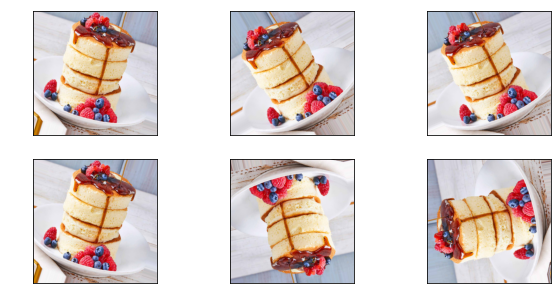

In [22]:
#-180度〜+180度の間でランダムに回転するImageDataGeneratorを作成
rotation_datagen = ImageDataGenerator(rotation_range = 180)
#画像を表示
show(rotation_datagen, img_cake)

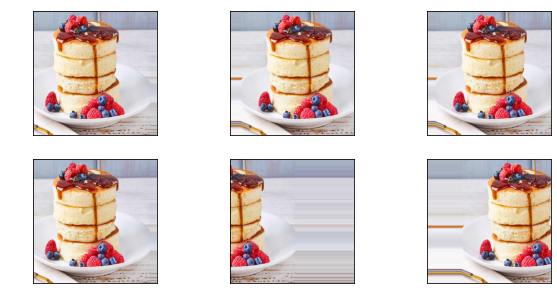

In [15]:
#-320〜+320の間でランダムに左右平行移動するImageDataGeneratorを作成
width_datagen = ImageDataGenerator(width_shift_range = 0.5)
show(width_datagen, img_cake)

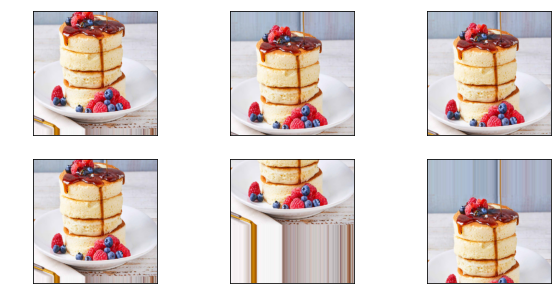

In [16]:
#-320〜+320の間でランダムに上下平行移動するImageDataGeneratorを作成
height_datagen = ImageDataGenerator(height_shift_range = 0.5)
show(height_datagen, img_cake)

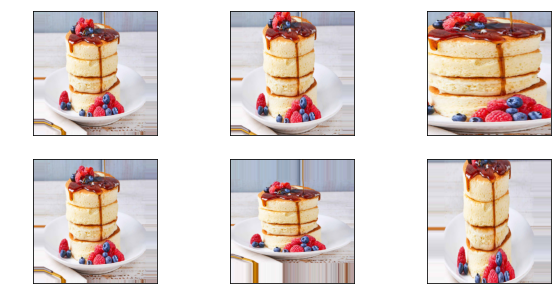

In [23]:
#0.5〜1.5の間でランダムに拡大又は縮小するImageDataGeneratorを作成
zoom_datagen = ImageDataGenerator(zoom_range = [0.5, 1.5])
show(zoom_datagen, img_cake)

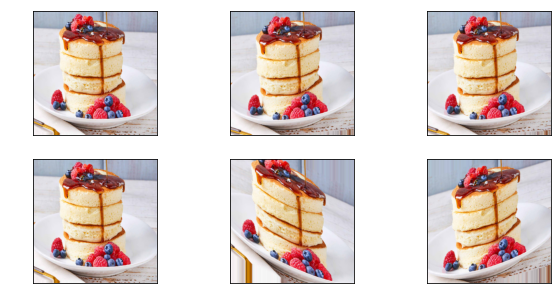

In [24]:
#30度の範囲でランダムにせん断するImageDataGeneratorを作成
shear_datagen = ImageDataGenerator(shear_range = 30)
show(shear_datagen, img_cake)

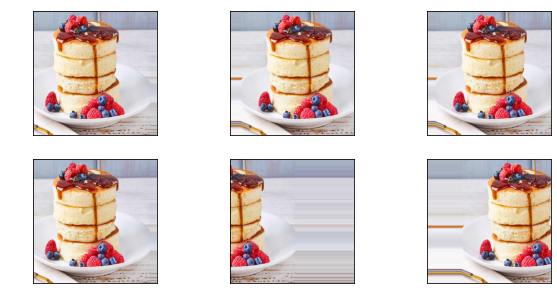

In [27]:
#nearestで補間するImageDataGeneratorを作成
nearest_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "nearest")
show(nearest_datagen, img_cake)

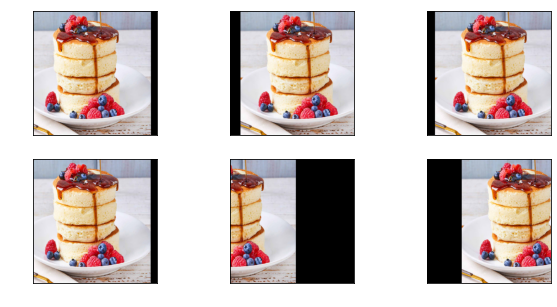

In [28]:
#constantで補間するImageDataGeneratorを作成
constant_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "constant", cval = 0)
show(constant_datagen, img_cake)

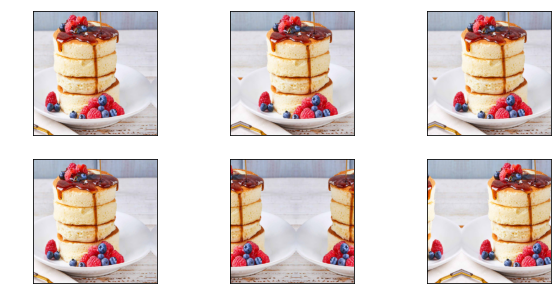

In [29]:
#reflctで補間するImageDataGeneratorを作成
reflect_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "reflect")
show(reflect_datagen, img_cake)

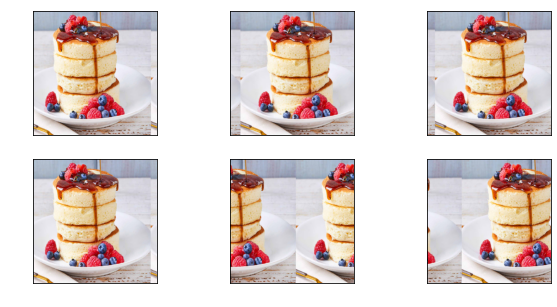

In [30]:
#wrapで補間するImageDataGeneratorを作成
wrap_datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = "wrap")
show(wrap_datagen, img_cake)

https://www.codexa.net/data_augmentation_python_keras/